<a href="https://colab.research.google.com/github/ferreirabruno7/Text_analyze/blob/master/geracao_ouvidoria_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Abordage 1 - Carregamento de dados

In [0]:
import nltk
import urllib
import bs4 as bs
import re
from gensim.models import Word2Vec
import pandas as pd
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#acessar google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
comentarios = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ouvidoria_covid_19_v2.csv", delimiter = ';', encoding='iso-8859-1')
comentarios.head()

,protocolo,data_manifestacao,manifestacao,municipio_denunciante,municipio_fato,localFato,status_atual,desc_status,sigla,nome,tipo_manifestacao,assunto,sub_assunto
0,2020.0314.215152-35,2020-03-14 21:51:52,Elogio com sugestão de ações,NaN,GOIANIA,Setor Candida de Morais,55,Finalizado pela ouvidoria do Órgão.,SGG/GOVERNADORIA,Secretaria Geral da Governadoria,Elogio,Saúde,"Corona Vírus - Denúncia, solicitação ou inform..."
1,2020.0316.083654-7,2020-03-16 08:36:54,Escolas fechadasEscritórios fechadosShopping v...,NaN,FORMOSA,Case,55,Finalizado pela ouvidoria do Órgão.,SEDS,Secretaria de Estado de Desenvolvimento Social...,Comunicação,COVID-19 - Corona Vírus,Estabelecimento aberto
2,2020.0316.203054-88,2020-03-16 20:30:54,Na empresa BTCC (prestadora de Serviços para O...,NaN,GOIANIA,Vila Redenção,55,Finalizado pela ouvidoria do Órgão.,SES,Secretaria de Estado da Saúde,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform..."
3,2020.0317.091024-64,2020-03-17 09:10:24,"O reclamante, Sr. Marcos Vinícius de Araújo, d...",NaN,GOIANIA,Via pública,55,Finalizado pela ouvidoria do Órgão.,SSP,Sec. Estado da Segurança Pública (Policias Civ...,Reclamação,COVID-19 - Corona Vírus,Estabelecimento aberto
4,2020.0318.081504-41,2020-03-18 08:15:04,Considerando o decreto do Sr. Governador quant...,NaN,ANAPOLIS,Vapt Vupt,55,Finalizado pela ouvidoria do Órgão.,SEAD,Secretaria de Estado de Administração (Antiga ...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform..."


In [0]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [0]:
#transformar coluna em lista
col_one_list = comentarios['manifestacao'].tolist()
texto = str(col_one_list)


In [0]:
# conveter lista para texto
nltk.download('punkt')
texto = str(col_one_list)
type(texto)
moby_tokens = nltk.word_tokenize(texto)
text1 = nltk.Text(moby_tokens)
text1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Text: [ 'Elogio com sugestão de ações ' ,...>

In [0]:
#total de termos no documento
from nltk.stem import WordNetLemmatizer

def total_termos():

    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(w,'v') for w in text1]

    return len(set(lemmatized))

total_termos()

13662

In [0]:
#importar bibliotecas bigram
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords

In [0]:
#bigram tokens
procurar = BigramCollocationFinder.from_words(moby_tokens)

In [0]:
#retira stopwords
retira = set(stopwords.words('portuguese'))

In [0]:
filtra = lambda w: len(w) <3 or w in retira

In [0]:
procurar.apply_word_filter(filtra)

In [0]:
#bigrams
procurar.nbest(BigramAssocMeasures.likelihood_ratio, 40)


[('funcionando', 'normalmente'),
 ('portas', 'fechadas'),
 ("'Boa", 'tarde'),
 ("'Bom", 'dia'),
 ('corona', 'vírus'),
 ('Ouvidoria', 'Geral'),
 ('trabalhando', 'normalmente'),
 ('Via', '181Interessado'),
 ('home', 'office'),
 ('Por', 'favor'),
 ('pleno', 'funcionamento'),
 ('tomadas.Manifestação', 'recebida'),
 ('Rio', 'Verde'),
 ('Secretario', 'Tarcisio'),
 ('assistente', 'Amanda'),
 ('estaduais', 'visando'),
 ('correndo', 'risco'),
 ('órgãos', 'municipais'),
 ('prazos', 'suspensos'),
 ('OUVIDORIA', 'SERVE'),
 ("'Quero", 'denunciar'),
 ('sendo', 'obrigados'),
 ('ESTAMOS', 'VIVENDO'),
 ('residente', 'morra'),
 ('contraria', 'TUDO'),
 ('responsabilizar', 'CIVIL'),
 ('CONTINUAM', 'ATÉ'),
 ('ESSA', 'OUVIDORIA'),
 ('Corona', 'Vírus'),
 ('Tarcisio', 'Francisco'),
 ('São', 'Paulo'),
 ('reclamante', 'disse'),
 ('PRESENTE', 'DIA'),
 ('sob', 'ameaça'),
 ('funcionários', 'trabalhando'),
 ('Governo', 'Federal'),
 ('continua', 'funcionando'),
 ('algum', 'residente'),
 ('PARA', 'ALGO'),
 ('SERVE', 

In [0]:
#termos frequentes com mais de 5 caracteres top 10
def termos_frequentes():
    dist = nltk.FreqDist(text1)
    vocab1 = dist.keys()
    freqwords = [w for w in vocab1 if len(w) > 3 and dist[w] > 2]
    return sorted(freqwords)

termos_frequentes()

["'Aglomeração",
 "'Algumas",
 "'Apesar",
 "'Aqui",
 "'Auto",
 "'Avenida",
 "'BOM",
 "'Bar",
 "'Boa",
 "'Bom",
 "'Casa",
 "'Centro",
 "'Clínica",
 "'Comerciantes",
 "'Comercio",
 "'Como",
 "'Comércio",
 "'Comércios",
 "'Concessionária",
 "'Confecção",
 "'Conforme",
 "'Construtora",
 "'Consultório",
 "'DENUNCIA",
 "'Denunciar",
 "'Denuncio",
 "'Denúncia",
 "'Descumprimento",
 "'Devido",
 "'Diante",
 "'Distribuidora",
 "'EMPRESA",
 "'Empresa",
 "'Empresas",
 "'Escola",
 "'Escritório",
 "'Estabelecimento",
 "'Estamos",
 "'Estou",
 "'Está",
 "'Estão",
 "'Existe",
 "'Existem",
 "'Faculdade",
 "'Ferragista",
 "'Fui",
 "'Funcionamento",
 "'Funcionários",
 "'Fábrica",
 "'Gostaria",
 "'Grande",
 "'Grupo",
 "'Hoje",
 "'Hotel",
 "'INDUSTRIA",
 "'Industria",
 "'Indústria",
 "'Informamos",
 "'Informação",
 "'Jbs",
 "'LOJA",
 "'Lava",
 "'Local",
 "'Loja",
 "'Lojas",
 "'Mais",
 "'Mercado",
 "'Mesmo",
 "'Meu",
 "'Minha",
 "'Moro",
 "'Muitos",
 "'Não",
 "'Obra",
 "'Oficina",
 "'Oficinas",
 "'Ola",
 "'O

In [0]:
dist = nltk.FreqDist(text1)
vocab1 = dist.keys()
freqwords = [w for w in vocab1 if len(w) > 3 and dist[w] > 2]
total = str(freqwords)


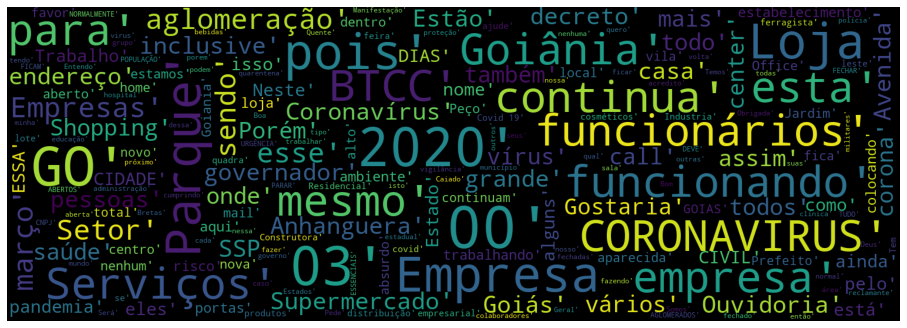

In [0]:
#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(total)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
#buscar twittes 

#importação de bibliotecacas
import tweepy
import re 
import pickle
import pandas as pd
import nltk
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:

#importação de bibliotecacas
import tweepy
import re 
import pickle
import pandas as pd
import nltk
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
pip install tqdm --upgrade

     |████████████████████████████████| 61kB 1.9MB/s 
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0


In [0]:
import pandas as pd
import gensim
import spacy
from tqdm import tqdm


In [0]:
tqdm.pandas(desc="Progress")

In [0]:
!python3 -m spacy download en_core_web_sm


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [0]:
nlp_en = spacy.load("en_core_web_sm")

In [0]:
comentarios = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid_19_Geral.csv", delimiter = ';', encoding='iso-8859-1')
comentarios.head()

,protocolo,data_manifestacao,municipio_denunciante,municipio_fato,localFato,manifestacao,status_atual,desc_status,sigla,nome,tipo_manifestacao,assunto,sub_assunto
0,2020.0314.215152-35,2020-03-14 21:51:52,NaN,GOIANIA,Setor Candida de Morais,Elogio com sugestão de ações,55,Finalizado pela ouvidoria do Órgão.,SGG/GOVERNADORIA,Secretaria Geral da Governadoria,Elogio,Saúde,"Corona Vírus - Denúncia, solicitação ou inform..."
1,2020.0316.203054-88,2020-03-16 20:30:54,NaN,GOIANIA,Vila Redenção,Na empresa BTCC (prestadora de Serviços para O...,55,Finalizado pela ouvidoria do Órgão.,SES,Secretaria de Estado da Saúde,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform..."
2,2020.0318.081504-41,2020-03-18 08:15:04,NaN,ANAPOLIS,Vapt Vupt,Considerando o decreto do Sr. Governador quant...,55,Finalizado pela ouvidoria do Órgão.,SEAD,Secretaria de Estado de Administração (Antiga ...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform..."
3,2020.0318.115152-35,2020-03-18 11:51:52,NaN,GOIANIA,POLÍCIA CÍVIL,Em meio a grave pandemia de coronavirus pela q...,55,Finalizado pela ouvidoria do Órgão.,SSP,Sec. Estado da Segurança Pública (Policias Civ...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform..."
4,2020.0318.115845-69,2020-03-18 11:58:45,NaN,GOIANIA,NaN,Em virtude do Decreto emitido pelo Governador ...,55,Finalizado pela ouvidoria do Órgão.,SSP,Sec. Estado da Segurança Pública (Policias Civ...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform..."


In [0]:
def get_tokens(sentence):
    return [x.text for x in nlp_en(sentence)]

In [0]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
comentarios["tokens"] = comentarios["manifestacao"].progress_apply(get_tokens)

Progress: 100%|██████████| 2129/2129 [00:32<00:00, 66.48it/s]


In [0]:
comentarios.to_pickle("pd_data_tokenized.pickle")

In [0]:
comentarios = pd.read_pickle("pd_data_tokenized.pickle")

In [0]:
model_w2v = gensim.models.Word2Vec(comentarios["tokens"].tolist(), min_count=5, window = 9, size = 100)

In [0]:
model_ft = gensim.models.FastText(comentarios["tokens"].tolist(), min_count=5, window = 9, size = 100)


In [0]:
model_w2v.save("model_w2v.model")
model_ft.save("model_ft.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
model_w2v = gensim.models.Word2Vec.load("model_w2v.model")
model_ft = gensim.models.FastText.load("model_ft.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
model_w2v.most_similar("funcionando", topn=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('normalmente', 0.9984535574913025),
 ('aberta', 0.998388946056366),
 ('Empresa', 0.9983341097831726),
 ('continua', 0.9980887770652771),
 ('está', 0.9980590343475342),
 ('descumprindo', 0.9980148673057556),
 ('funcionamento', 0.9980027079582214),
 ('recebendo', 0.9978110194206238),
 ('Indústria', 0.9977840185165405),
 ('esta', 0.9977736473083496),
 ('após', 0.9976708889007568),
 ('abertas', 0.9976555109024048),
 ('fabricação', 0.9976383447647095),
 ('atividades', 0.9975713491439819),
 ('vendendo', 0.9975452423095703),
 ('mínimo', 0.9975059628486633),
 ('normal', 0.9975036382675171),
 ('bebidas', 0.9975030422210693),
 ('ordem', 0.9974856376647949),
 ('postes', 0.9974217414855957)]

In [0]:
model_w2v.most_similar(positive=['Parque'], topn=20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Oeste', 0.9996801614761353),
 ('Lt', 0.9996479749679565),
 ('localizada', 0.9996461272239685),
 ('Qd', 0.9996439218521118),
 ('Endereço', 0.9995959997177124),
 ('lote', 0.9995722770690918),
 ('endereço', 0.9995334148406982),
 ('Avenida', 0.999522864818573),
 ('Anápolis', 0.9995024800300598),
 ('Vila', 0.9994961619377136),
 ('Santa', 0.9994246959686279),
 ('Branco', 0.9994121193885803),
 ('1', 0.9994010925292969),
 ('Verde', 0.9993071556091309),
 ('nº', 0.9992910623550415),
 ('Castelo', 0.9992694854736328),
 ('localizado', 0.9992259740829468),
 ('situada', 0.9992216229438782),
 ('esquina', 0.9992121458053589),
 ('setor', 0.9991903305053711)]

In [0]:
model_w2v.most_similar(positive=['funcionando'], topn=20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('normalmente', 0.9984535574913025),
 ('aberta', 0.998388946056366),
 ('Empresa', 0.9983341097831726),
 ('continua', 0.9980887770652771),
 ('está', 0.9980590343475342),
 ('descumprindo', 0.9980148673057556),
 ('funcionamento', 0.9980027079582214),
 ('recebendo', 0.9978110194206238),
 ('Indústria', 0.9977840185165405),
 ('esta', 0.9977736473083496),
 ('após', 0.9976708889007568),
 ('abertas', 0.9976555109024048),
 ('fabricação', 0.9976383447647095),
 ('atividades', 0.9975713491439819),
 ('vendendo', 0.9975452423095703),
 ('mínimo', 0.9975059628486633),
 ('normal', 0.9975036382675171),
 ('bebidas', 0.9975030422210693),
 ('ordem', 0.9974856376647949),
 ('postes', 0.9974217414855957)]

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

In [0]:
%%time
model_w2v = gensim.models.Word2Vec(comentarios["tokens"].tolist(), min_count=250, window = 9, size = 100)

CPU times: user 218 ms, sys: 7.92 ms, total: 226 ms
Wall time: 170 ms


In [0]:
tokens = []
labels = []

for x in model_w2v.wv.vocab:
    tokens.append(model_w2v[x])
    labels.append(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [0]:
%%time
tsne_model = TSNE(n_components=2, random_state=11)
fitted = tsne_model.fit_transform(tokens)

CPU times: user 511 ms, sys: 11.8 ms, total: 523 ms
Wall time: 281 ms


In [0]:
output_file("/content/drive/My Drive/Colab Notebooks/plot_covid_19.html")
            
p = figure(plot_width=1000, plot_height=1000)

lst = list(model_w2v.wv.vocab)



p.circle(fitted[:, 0], fitted[:, 1], size=2, color="navy", alpha=0.5)

texts = lst


source = ColumnDataSource(data=dict(x=fitted[:, 0], y=fitted[:, 1], text=texts))

labels = LabelSet(x='x', y='y', text='text',
         x_offset=5, y_offset=5, source=source)
p.add_layout(labels)



show(p)

**Cluster de TExto**

In [0]:
#ajsutar dataframe
dfObj = [e for e in comentarios["manifestacao"] if isinstance(e, str)]
dfObj = pd.DataFrame(dfObj)

In [0]:
#importa biblitotecas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer() # variar parametros (L1/L2, etc)
X = vectorizer.fit_transform(comentarios["manifestacao"])
X = normalize(X)

In [0]:
kmeans = KMeans(
    n_clusters = 8, # variar
    n_init = 15, 
    max_iter = 450, 
    init = 'k-means++'
)

In [0]:
#treinar com kmeans

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=450,
       n_clusters=8, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
comentarios['cluster'] = kmeans.labels_
comentarios

,protocolo,data_manifestacao,municipio_denunciante,municipio_fato,localFato,manifestacao,status_atual,desc_status,sigla,nome,tipo_manifestacao,assunto,sub_assunto,tokens,cluster
0,2020.0314.215152-35,2020-03-14 21:51:52,NaN,GOIANIA,Setor Candida de Morais,Elogio com sugestão de ações,55,Finalizado pela ouvidoria do Órgão.,SGG/GOVERNADORIA,Secretaria Geral da Governadoria,Elogio,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Elogio, com, sugestão, de, ações]",3
1,2020.0316.203054-88,2020-03-16 20:30:54,NaN,GOIANIA,Vila Redenção,Na empresa BTCC (prestadora de Serviços para O...,55,Finalizado pela ouvidoria do Órgão.,SES,Secretaria de Estado da Saúde,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Na, empresa, BTCC, (, prestadora, de, Serviço...",5
2,2020.0318.081504-41,2020-03-18 08:15:04,NaN,ANAPOLIS,Vapt Vupt,Considerando o decreto do Sr. Governador quant...,55,Finalizado pela ouvidoria do Órgão.,SEAD,Secretaria de Estado de Administração (Antiga ...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Considerando, o, decreto, do, Sr, ., Governad...",5
3,2020.0318.115152-35,2020-03-18 11:51:52,NaN,GOIANIA,POLÍCIA CÍVIL,Em meio a grave pandemia de coronavirus pela q...,55,Finalizado pela ouvidoria do Órgão.,SSP,Sec. Estado da Segurança Pública (Policias Civ...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Em, meio, a, grave, pandemia, de, coronavirus...",5
4,2020.0318.115845-69,2020-03-18 11:58:45,NaN,GOIANIA,NaN,Em virtude do Decreto emitido pelo Governador ...,55,Finalizado pela ouvidoria do Órgão.,SSP,Sec. Estado da Segurança Pública (Policias Civ...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Em, virtude, do, Decreto, emitido, pelo, Gove...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,2020.0323.171546-19,2020-03-23 17:15:46,NaN,GOIANIA,avenida desembargador emilio francisco povoa,Aglomeraçao de pessoas trabalhando,1,NaN,SES,Secretaria de Estado da Saúde,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Aglomeraçao, de, pessoas, trabalhando]",4
2125,2020.0323.171729-93,2020-03-23 17:17:29,NaN,ITABERAI,NaN,Prefeitura de Itaberaí está funcionando norma...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Prefeitura, de, Itaberaí, está, funcionando, ...",4
2126,2020.0323.171814-6,2020-03-23 17:18:14,NaN,APARECIDA DE GOIANIA,Odorata Cosméticos,Um funcionário acabou de homologar o atestado ...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Um, funcionário, acabou, de, homologar, o, at...",5
2127,2020.0323.172012-42,2020-03-23 17:20:12,NaN,INHUMAS,Construção do hospital do câncer de Goiás,Obra do HCG inhumas em funcionamento sem ne...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Obra, do, HCG, , inhumas, , em, funcionamen...",2


In [0]:
comentarios['cluster'].value_counts()

3    552
5    509
2    370
6    216
4    203
7    141
1    125
0     13
Name: cluster, dtype: int64

In [0]:
comentarios.to_csv('/content/drive/My Drive/Colab Notebooks/covid_19_cluuster_new.csv')


In [0]:
text = ['funcionando']


In [0]:
X_new = vectorizer.transform(text)
comentarios['coseno'] = cosine_similarity(X_new, X)[0]
print(comentarios.sort_values(by = 'coseno'))

                protocolo    data_manifestacao  ... cluster    coseno
0     2020.0314.215152-35  2020-03-14 21:51:52  ...       3  0.000000
1332  2020.0323.100903-21  2020-03-23 10:09:03  ...       5  0.000000
1331  2020.0323.100853-60  2020-03-23 10:08:53  ...       1  0.000000
1330  2020.0323.100845-67  2020-03-23 10:08:45  ...       6  0.000000
1329   2020.0323.100835-8  2020-03-23 10:08:35  ...       7  0.000000
...                   ...                  ...  ...     ...       ...
300   2020.0320.230434-94  2020-03-20 23:04:34  ...       3  0.300338
1816  2020.0323.130117-66  2020-03-23 13:01:17  ...       4  0.312938
1881  2020.0323.134229-38  2020-03-23 13:42:29  ...       2  0.319629
1305  2020.0323.100024-94  2020-03-23 10:00:24  ...       2  0.422764
996   2020.0322.214243-68  2020-03-22 21:42:43  ...       2  0.630653

[2129 rows x 16 columns]


In [0]:
comentarios[comentarios['coseno']>0.2]

,protocolo,data_manifestacao,municipio_denunciante,municipio_fato,localFato,manifestacao,status_atual,desc_status,sigla,nome,tipo_manifestacao,assunto,sub_assunto,tokens,cluster,coseno
203,2020.0320.194657-79,2020-03-20 19:46:57,NaN,GOIANIA,Rua Jaraguá Setor Campinas,Loja comercial funcionando durante a quarentena,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Loja, comercial, funcionando, durante, a, qua...",7,0.298126
300,2020.0320.230434-94,2020-03-20 23:04:34,NaN,COCALZINHO DE GOIAS,"Cocalzinho de Goiás - GO, 72975-000",Funcionamento de uma lanchonete que está funci...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Funcionamento, de, uma, lanchonete, que, está...",3,0.300338
470,2020.0321.121644-83,2020-03-21 12:16:44,NaN,INHUMAS,Ferragista Goiás,Ferragista Goiás está funcionando normalmente ...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Ferragista, Goiás, está, funcionando, normalm...",2,0.204201
484,2020.0321.121823-49,2020-03-21 12:18:23,NaN,APARECIDA DE GOIANIA,NaN,Indústrias no polo industrial funcionando norm...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Indústrias, no, polo, industrial, funcionando...",6,0.202958
651,2020.0321.134757-98,2020-03-21 13:47:57,NaN,SANTA ROSA DE GOIAS,Toda a cidade,Comércios funcionando normalmente em horário c...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Comércios, funcionando, normalmente, em, horá...",3,0.213368
669,2020.0321.141858-30,2020-03-21 14:18:58,NaN,GOIANIA,Edifício orion.,Sistemas de valet manobristas tem que continua...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Sistemas, de, valet, manobristas, tem, que, c...",5,0.209767
683,2020.0321.144758-27,2020-03-21 14:47:58,NaN,APARECIDA DE GOIANIA,Ferragens Negrão (ao lado da indústria arroz c...,Empresa funcionando normal com mais de 30 func...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Empresa, funcionando, normal, com, mais, de, ...",2,0.300301
693,2020.0321.152317-83,2020-03-21 15:23:17,NaN,APARECIDA DE GOIANIA,Govesa consórcio,Empresa funcionando na cidade empresarial Apar...,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Empresa, funcionando, na, cidade, empresarial...",3,0.260704
949,2020.0322.190517-84,2020-03-22 19:05:17,NaN,ITABERAI,Metal hidro,"Muita gente no local , e estão funcionando nor...",1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[Muita, gente, no, local, ,, e, estão, funcion...",3,0.277407
996,2020.0322.214243-68,2020-03-22 21:42:43,NaN,APARECIDA DE GOIANIA,"Av. Rio Verde, Jardim Helvécia. CEP:74.933-750",A empresa está funcionando,1,NaN,CGE,Controladoria-Geral do Estado de Goiás / Ouvid...,Comunicação,Saúde,"Corona Vírus - Denúncia, solicitação ou inform...","[A, empresa, está, funcionando]",2,0.630653
